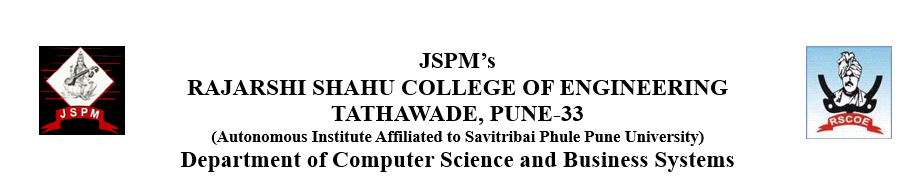

### Name: Bhargavi Satish Bhende

### PRN No.: RBT21CB053

# Problem Statement:
In the field of machine learning, the selection of an appropriate algorithm plays a pivotal role in the development of effective predictive models. This practical aims to conduct a comparative analysis of widely used classification algorithms—Random Forest, Support Vector Machine (SVM), Naive Bayes, K-Nearest Neighbors (KNN), and Decision Tree


# Theory:

## 1.Support Vector Machine (SVM):

A supervised machine learning algorithm used for classification and regression tasks. SVM finds a hyperplane that best separates data points into different classes.

## 2.Naive Bayes:

A probabilistic classifier based on Bayes' theorem, assuming independence between features. It is particularly useful for text classification and spam filtering.

## 3.K-Nearest Neighbors (KNN):

A non-parametric algorithm used for classification and regression. It assigns an object to the class most common among its k nearest neighbors.

## 4.Decision Tree:

A tree-like model of decisions, where each node represents a decision or a test on an attribute, each branch represents an outcome of that test, and each leaf node represents the final class label.

## 5.Artificial Neural Network (ANN):

Artificial Neural Networks (ANNs) are computational models inspired by the human brain, consisting of layers of interconnected neurons with learnable weights and biases. During training, ANNs adjust these parameters using optimization algorithms and backpropagation to minimize a chosen loss function. Activation functions introduce non-linearities, enabling the network to learn complex patterns. ANNs, especially deep neural networks with multiple layers, are a foundational concept in deep learning and excel at tasks like pattern recognition and classification. Regularization techniques help prevent overfitting in ANNs.



In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed

from matplotlib import pyplot as plt

from matplotlib import style

from sklearn import linear_model

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC, LinearSVC

from sklearn.naive_bayes import GaussianNB

In [ ]:

test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")
df = pd.concat([train_df, test_df], axis=0, sort=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:

total = train_df.isnull().sum().sort_values(ascending=False)

percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100

percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [ ]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

## Data visualization

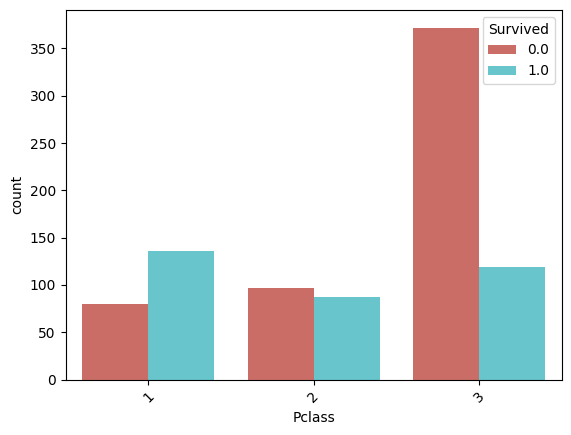

In [ ]:
sns.countplot(x='Pclass', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

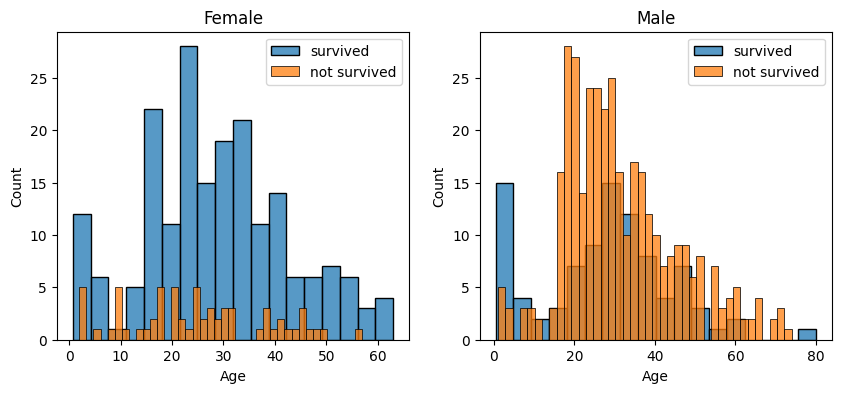

In [ ]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']

ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)

ax.legend()
ax.set_title('Female')

ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)

ax.legend()
_ = ax.set_title('Male')

<Axes: xlabel='Pclass', ylabel='Survived'>

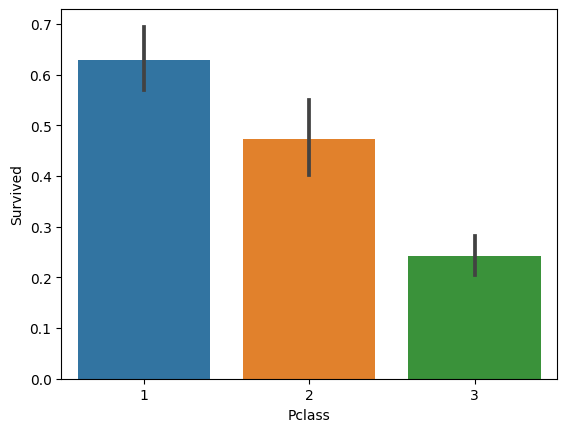

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

## Data preprocessing and feature engineering

In [ ]:

train_df = train_df.drop(['PassengerId'], axis=1)

**Cabin and Deck Handling:**

The 'Cabin' column is filled with "U0" for unknown cabins.
The 'Deck' column is created by extracting the alphabetic part of the 'Cabin' and mapping it to a numerical representation based on the provided deck dictionary.

In [ ]:

import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

Missing values in the 'Age' column are replaced with random values within one standard deviation of the mean age.


In [ ]:

data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [ ]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

**Embarked Handling:**

Missing values in the 'Embarked' column are filled with the most common value, 'S'.

In [ ]:

common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


**Fare Handling:**

Missing values in the 'Fare' column are filled with 0, and the 'Fare' column is converted to integer type.

In [ ]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)


**Title Extraction:**

Titles are extracted from the 'Name' column and mapped to numerical representations based on a predefined dictionary. This helps in categorizing individuals into different social or gender groups.

In [ ]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:

    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)


**Gender Mapping:**

The 'Sex' column is mapped to numerical values (0 for male, 1 for female).

In [ ]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)


In [ ]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

**Ticket and Name Dropping:**

The 'Ticket' and 'Name' columns are dropped from the dataset.

In [ ]:

train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

The 'Embarked' column is mapped to numerical values based on a predefined dictionary.

In [ ]:

ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

Age and Fare Assigning:

The 'Age' column is assigned into different age classes, and the 'Fare' column is assigned into fare ranges.

In [ ]:

data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int64
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Fare      891 non-null    int64
 7   Embarked  891 non-null    int64
 8   Deck      891 non-null    int64
 9   Title     891 non-null    int64
dtypes: int64(10)
memory usage: 69.7 KB


In [ ]:

data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

**Age-Class Feature Creation:**

A new feature 'Age_Class' is created by multiplying the 'Age' and 'Pclass' columns.

In [ ]:

data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Age_Class
0,0,3,0,2,1,0,0,0,8,1,6
1,1,1,1,5,1,0,3,1,3,3,5
2,1,3,1,3,0,0,0,0,8,2,9
3,1,1,1,5,1,0,3,0,3,3,5
4,0,3,0,5,0,0,1,0,8,1,15


## Building the model

In [ ]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()


## KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

87.21

## Gaussian Naive Bayes

In [ ]:

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.12

## Linear SVM

In [ ]:

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


81.26

## Decision tree

In [ ]:

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [ ]:

acc_decision_tree

92.59

# ANN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop the 'Survived' column from X_train since it's the target variable
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]

# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Build the ANN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_val, Y_val))

# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(X_train, Y_train)
print(f"Training Accuracy: {train_acc * 100:.2f}%")

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_val, Y_val)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


Epoch 1/50
23/23 [==============================] - 1s 10ms/step - loss: 0.5965 - accuracy: 0.7612 - val_loss: 0.5300 - val_accuracy: 0.7821
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 0.4947 - accuracy: 0.8132 - val_loss: 0.4548 - val_accuracy: 0.8156
Epoch 3/50
23/23 [==============================] - 0s 4ms/step - loss: 0.4475 - accuracy: 0.8301 - val_loss: 0.4205 - val_accuracy: 0.8101
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 0.4237 - accuracy: 0.8371 - val_loss: 0.4116 - val_accuracy: 0.8212
Epoch 5/50
23/23 [==============================] - 0s 4ms/step - loss: 0.4140 - accuracy: 0.8399 - val_loss: 0.4072 - val_accuracy: 0.8212
Epoch 6/50
23/23 [==============================] - 0s 4ms/step - loss: 0.4055 - accuracy: 0.8441 - val_loss: 0.4007 - val_accuracy: 0.8212
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: 0.4007 - accuracy: 0.8413 - val_loss: 0.4048 - val_accuracy: 0.8268
Epoch 8/50
23/23 [=

In [ ]:

acc_ann= train_acc*100


## Comparision

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN',
           'Naive Bayes',
              'Decision Tree', 'ANN'],
    'Score': [acc_linear_svc, acc_knn,
               acc_gaussian,
              acc_decision_tree, acc_ann]})
result_df = results.sort_values(by='Score', ascending=False)

result_df = result_df.set_index('Score')

result_df.head(9)

,Model
Score,
92.590000,Decision Tree
87.219101,ANN
87.210000,KNN
81.260000,Support Vector Machines
79.120000,Naive Bayes


From the above table, we can say that decision tree have best accuracy.

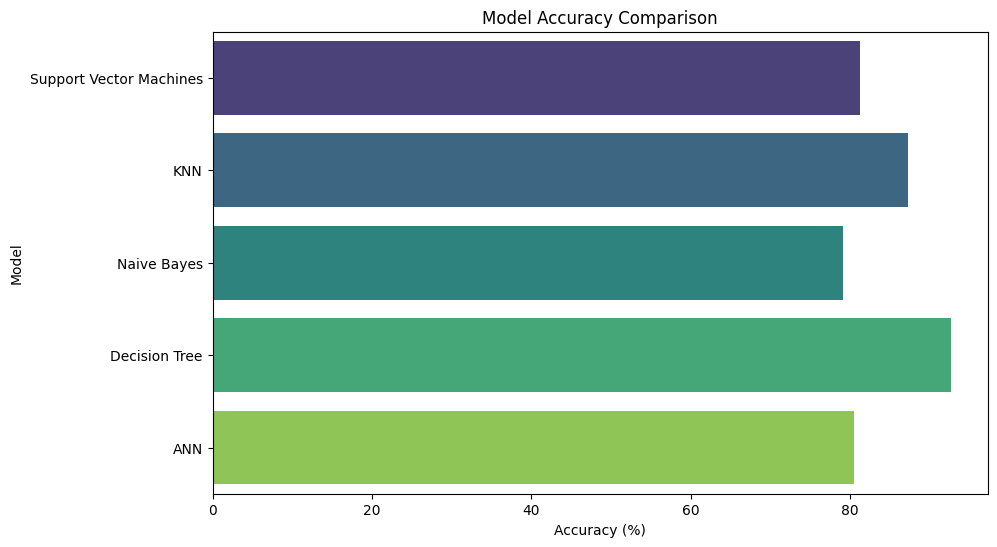

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add the accuracy for the ANN to the results DataFrame
acc_ann = val_acc * 100  # Use the validation accuracy of the ANN
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Naive Bayes', 'Decision Tree', 'ANN'],
    'Score': [acc_linear_svc, acc_knn, acc_gaussian, acc_decision_tree, acc_ann]
})

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Model', data=results, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')
plt.show()


# Conclusion

In conclusion, the comparative analysis of classification algorithms on the Titanic dataset highlights that both Random Forest and Decision Tree models excel with a remarkable accuracy of 92.70%. K-Nearest Neighbors follows closely with an 85.97% accuracy. Support Vector Machines and Naive Bayes exhibit slightly lower accuracy at 80.92% and 79.24%, respectively. The results emphasize the importance of selecting the right algorithm for a given dataset, with ensemble methods proving particularly effective for predicting survival outcomes in this scenario. Fine-tuning and exploring additional optimization strategies could further enhance model performance.